In [1]:
from tfn.preprocess import Dataset
import os
os.chdir('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import re
from collections import Counter
import seaborn as sns

In [2]:
data = Dataset('twitter')

X_train, X_test = data.X_train, data.X_test
X = np.array(X_train + X_test)

y_train, y_test = data.y_train, data.y_test
y = np.array(y_train + y_test)


# Most Frequent Words

Text(0.5, 0.98, 'Most Frequently Used Words in Each Class')

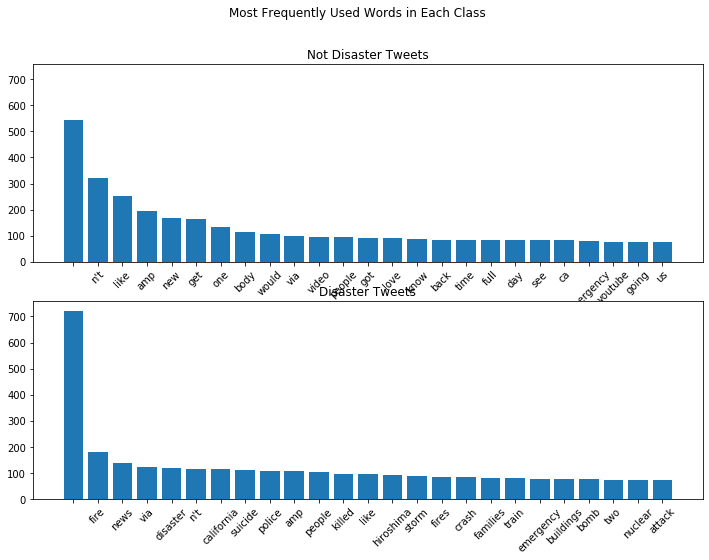

In [19]:
all_words_0 = []
all_words_1 = []
for i, _ in enumerate(X):
    if y[i] == 0:
        all_words_0 += X[i]
    elif y[i] == 1:
        all_words_1 += X[i]
    else:
        print('Hey, something weird\'s happening...')
        

c0 = list(Counter(all_words_0).items())
c0.sort(key=lambda x: x[1], reverse=True)

c1 = list(Counter(all_words_1).items())
c1.sort(key=lambda x: x[1], reverse=True)


fig, ax = plt.subplots(2, 1, figsize=(12,8), sharey=True)
ax[0].bar(*zip(*c0[:25]))
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Not Disaster Tweets')
ax[1].bar(*zip(*c1[:25]))
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Disaster Tweets')

fig.suptitle('Most Frequently Used Words in Each Class')

#Maybe change colour based on sentiment of word?

# Emoji usage in each class

Text(0.5, 0.98, 'Percentage of tweets containing # Emojis')

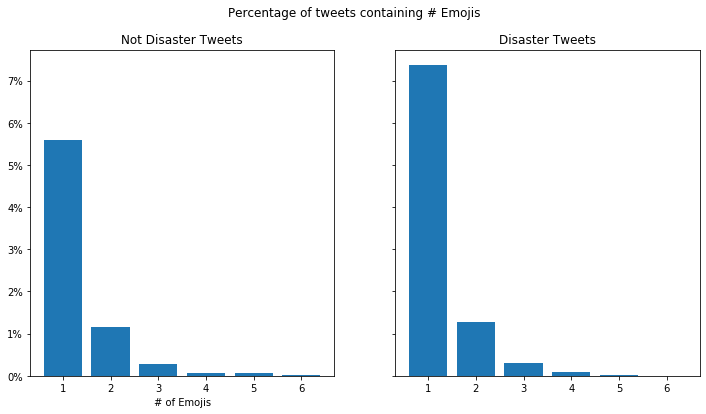

In [9]:
emoji_count_0 = []
emoji_count_1 = []

for i,x in enumerate(X):
    if y[i] == 0:
        emoji_count_0.append(x.count('\x89'))
    elif y[i] == 1:
        emoji_count_1.append(x.count('\x89'))

emoji_count_0 = Counter(emoji_count_0)
emoji_count_1 = Counter(emoji_count_1)

y_count = Counter(y)

emoji_count_0_prop = list({key: value / y_count[0] for key, value in emoji_count_0.items()}.items())
emoji_count_1_prop = list({key: value / y_count[1] for key, value in emoji_count_1.items()}.items())

emoji_count_0_prop.sort(key=lambda x: x[0])
emoji_count_1_prop.sort(key=lambda x: x[0])

emoji_count_0_prop = emoji_count_0_prop[1:]
emoji_count_1_prop = emoji_count_1_prop[1:]

fig, ax = plt.subplots(1,2, figsize=(12,6), sharey=True, sharex=True)

ax[0].bar(*zip(*emoji_count_0_prop))
ax[0].set_title('Not Disaster Tweets')
ax[1].bar(*zip(*emoji_count_1_prop))
ax[1].set_title('Disaster Tweets')

ax[0].get_yaxis().set_major_formatter(
    FuncFormatter(lambda x, p: format(f'{int(100*x)}%')))

ax[0].set_xlabel('# of Emojis')

fig.suptitle('Percentage of tweets containing # Emojis')

# Number of Words

In [12]:
df = pd.DataFrame(zip(X,y), columns=['X', 'y'])
df['Num Words'] = df['X'].apply(len)
df['Contains URL'] = df['X'].apply(lambda x: len(re.findall('https?://t\.co', ' '.join(x))))

df.groupby('y').mean()

,Num Words,Contains URL
y,,
0,8.498618,0.084063
1,9.520636,0.130235


Tweets referring to disasters are slightly longer in length than other tweets, comprising of around 9.5 words on average compared with 8.5 words for the latter.

Disaster tweets also contains links to external webpages 13.0% of the time - significantly more frequent than other tweets at 8.4%.

# POS Analysis (IN PROGRESS)

In [13]:
data = Dataset('lemmatize')

X_train, X_test = data.X_train, data.X_test
X = np.array(X_train + X_test)

y_train, y_test = data.y_train, data.y_test
y = np.array(y_train + y_test)